## Paired Model-Dataset Test -- uint16

This notebook is designed for fast testing for uint16 dataset with the provided fine-tuned model and its corresponding dataset.


---

For broader generalizable testing across multiple datasets, please refer to:

```general_test_model.ipynb``` 


---


In [1]:
from basicsr.demo_test import * 
from basicsr.model_train import restore
import matplotlib.pyplot as plt
import cv2
import os 

### Our fine-tuned models for specific datasets

Choose a sample from 'Endometrium_THG', 'Endometrium_SHG', 'Endometrium_FAD'

In [2]:
# 'Endometrium_THG', 'Endometrium_SHG', 'Endometrium_FAD'
sample = 'Endometrium_THG'
model_pth, data_pth = options(sample)

In [3]:
print(model_pth)
print(data_pth)

../experiments/pretrained/endometrium/CH1
../dataset/endometrium/CH1


In [ ]:
output = restore(
    input_pth = data_pth,
    output_pth = f'../experiments/{sample}',\
    model_pth =  os.path.join(model_pth, 'net_g_latest.pth'))

Text(0.5, 1.0, 'Raw')

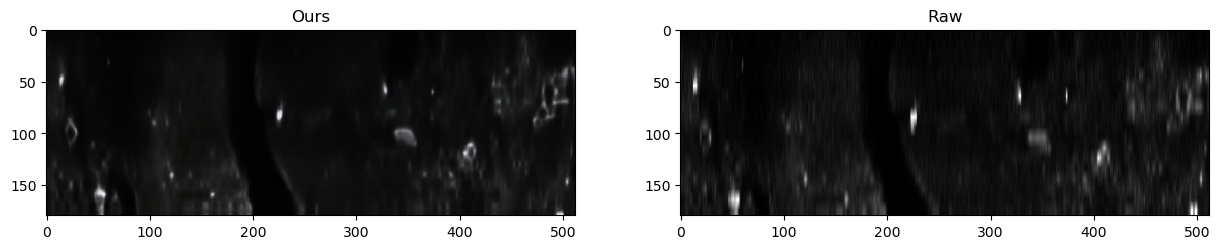

In [34]:
idx = 187
ours = cv2.imread(os.path.join(f'../experiments/{sample}', f'{idx}.png'))
raw = cv2.imread(os.path.join(data_pth, f'{idx}.png'))
figs, axs = plt.subplots(1,2,figsize=(15,20))
axs[0].imshow(ours, cmap = 'gray')
axs[0].set_title('Ours')
axs[1].imshow(raw, cmap = 'gray')
axs[1].set_title('Raw')

### Using Pre-trained model

In [ ]:
model_pth

In [ ]:
output = restore(
    input_pth = data_pth,
    output_pth = f'../experiments/pretrained_{sample}',\
    model_pth =  f'../experiments/pretrained/endometrium/pretrained/NAFNet-REDS-width64.pth')

Text(0.5, 1.0, 'Raw')

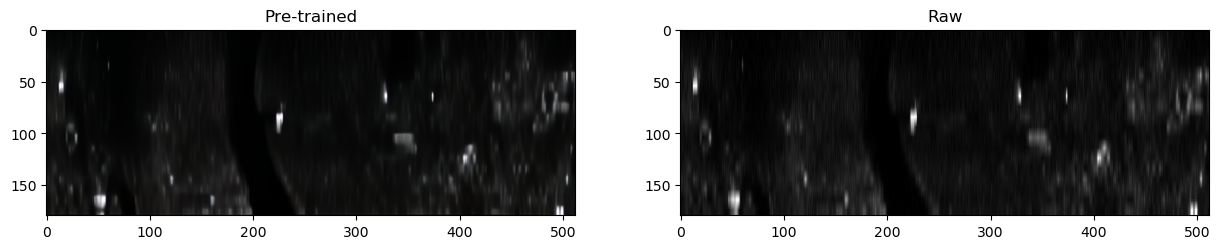

In [37]:
idx = 187
ours = cv2.imread(os.path.join(f'../experiments/pretrained_{sample}', f'{idx}.png'))
raw = cv2.imread(os.path.join(data_pth, f'{idx}.png'))
figs, axs = plt.subplots(1,2,figsize=(15,20))
axs[0].imshow(ours, cmap = 'gray')
axs[0].set_title('Pre-trained')
axs[1].imshow(raw, cmap = 'gray')
axs[1].set_title('Raw')